In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv("data/winequality-white.csv",sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Preprocessing Data 
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
bins = (3, 6.5, 9)
group_names = ["bad", "good"]
df["quality"] = pd.cut(df["quality"], bins = bins, labels = group_names)

In [8]:
label_quality = LabelEncoder()

In [9]:
df["quality"] = label_quality.fit_transform(df["quality"])

In [10]:
df["quality"].value_counts() #problem with 2

0    3818
1    1060
2      20
Name: quality, dtype: int64

/home/zalman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

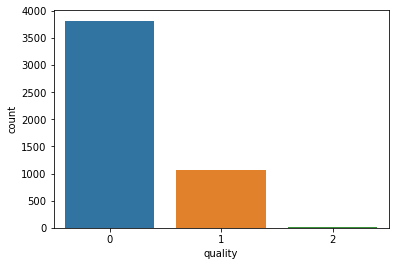

In [11]:
sns.countplot(df["quality"])

In [12]:
df = df[df.quality != 2]

<AxesSubplot:xlabel='quality', ylabel='count'>

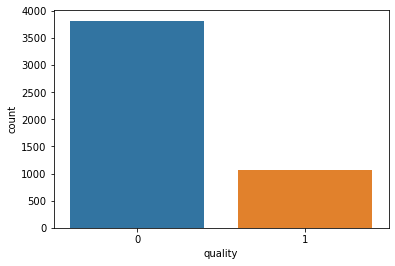

In [13]:
sns.countplot(x = df["quality"])

In [14]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [15]:
# Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Applying Standard scaling to get it optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Random Forest Classifier 

In [17]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
# model performance
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       789
           1       0.80      0.58      0.67       187

    accuracy                           0.89       976
   macro avg       0.85      0.77      0.80       976
weighted avg       0.89      0.89      0.88       976

[[761  28]
 [ 78 109]]


# SVM Classifier

In [19]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [20]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       789
           1       0.66      0.33      0.44       187

    accuracy                           0.84       976
   macro avg       0.76      0.64      0.67       976
weighted avg       0.82      0.84      0.82       976

[[758  31]
 [126  61]]


# Neural Network

In [21]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/home/zalman/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       789
           1       0.58      0.45      0.51       187

    accuracy                           0.83       976
   macro avg       0.73      0.69      0.70       976
weighted avg       0.82      0.83      0.82       976

[[728  61]
 [103  84]]


In [23]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.8913934426229508

# Decision Trees

In [24]:
from sklearn import tree

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knc = KNeighborsClassifier()
knc.fit(X, y)
knc.score(X, y)

0.8569085690856909

# Boosting